<a href="https://colab.research.google.com/github/madhumithadasarathy/CODSOFT/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVM)

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
df = pd.read_csv("/content/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.drop(columns = ['CustomerId','Surname','RowNumber'],inplace=True)

In [8]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

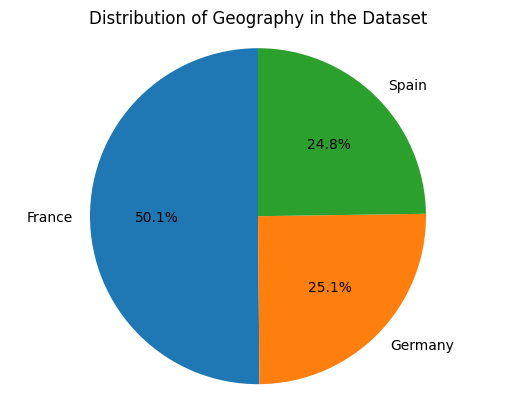

In [9]:
geography_counts = df['Geography'].value_counts()
labels = geography_counts.index
sizes = geography_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Geography in the Dataset')
plt.axis('equal')
plt.show()

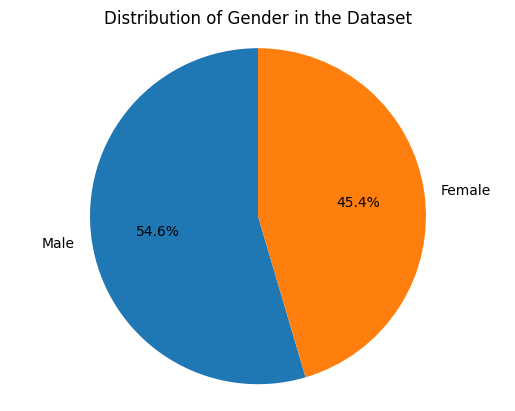

In [10]:
gender_counts = df['Gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Gender in the Dataset')
plt.axis('equal')
plt.show()

In [11]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [12]:
df['Gender_Male'].values

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [13]:
df['Geography_Germany'].values

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [14]:
X = df.drop(columns=['Exited'])
X = X.values
y = df['Exited'].values

## Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [16]:
print(X_train)

[[579.  39.   5. ...   1.   0.   0.]
 [750.  32.   5. ...   0.   0.   0.]
 [729.  34.   9. ...   0.   1.   0.]
 ...
 [738.  35.   5. ...   0.   0.   1.]
 [590.  38.   9. ...   0.   1.   0.]
 [623.  48.   1. ...   1.   0.   0.]]


In [17]:
print(y_train)

[1 0 0 ... 0 0 1]


In [18]:
print(X_test)

[[597.  35.   8. ...   1.   0.   0.]
 [523.  40.   2. ...   0.   0.   0.]
 [706.  42.   8. ...   0.   1.   0.]
 ...
 [840.  39.   1. ...   0.   0.   0.]
 [679.  38.   7. ...   1.   0.   1.]
 [735.  31.   3. ...   0.   0.   1.]]


In [19]:
print(y_test)

[0 1 0 ... 0 0 0]


## Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
print(X_train)

[[-0.73550706  0.01526571  0.00886037 ...  1.76021608 -0.57468161
  -1.08726059]
 [ 1.02442719 -0.65260917  0.00886037 ... -0.56811207 -0.57468161
  -1.08726059]
 [ 0.80829492 -0.46178778  1.39329338 ... -0.56811207  1.74009395
  -1.08726059]
 ...
 [ 0.90092304 -0.36637708  0.00886037 ... -0.56811207 -0.57468161
   0.91974271]
 [-0.62229491 -0.08014499  1.39329338 ... -0.56811207  1.74009395
  -1.08726059]
 [-0.28265848  0.87396199 -1.37557264 ...  1.76021608 -0.57468161
  -1.08726059]]


In [22]:
print(X_test)

[[-0.55025082 -0.36637708  1.04718513 ...  1.76021608 -0.57468161
  -1.08726059]
 [-1.31185979  0.11067641 -1.02946438 ... -0.56811207 -0.57468161
  -1.08726059]
 [ 0.57157862  0.3014978   1.04718513 ... -0.56811207  1.74009395
  -1.08726059]
 ...
 [ 1.95070838  0.01526571 -1.37557264 ... -0.56811207 -0.57468161
  -1.08726059]
 [ 0.29369426 -0.08014499  0.70107688 ...  1.76021608 -0.57468161
   0.91974271]
 [ 0.870047   -0.74801987 -0.68335613 ... -0.56811207 -0.57468161
   0.91974271]]


## Training the SVM model on the Training set

In [23]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## Predicting the Test set results

In [25]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Making the Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
accuracy_score(y_test, y_pred)

0.7964